<a href="https://www.kaggle.com/aminizahra/quadratic-multiclass-classification?scriptVersionId=88419794" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Quadratic Multiclass Classification**

<img src="https://i.ibb.co/KXKT8Tj/QMC1.png" alt="QMC1" border="0">

<img src="https://i.ibb.co/hW0DNPz/QMC2.png" alt="QMC2" border="0">

# Import Library

In [1]:
# pip install mlxtend  

In [2]:
import pandas as pd
import numpy as np

In [3]:
import math

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from mlxtend.plotting import plot_decision_regions

In [5]:
from scipy.stats import multivariate_normal

# Dataset Generator

In [6]:
class SampleGenerator:
    def __init__(self, mean, cov, n):
        self.mean = mean
        self.cov = cov
        self.n = n

    def generate(self):
        x = np.random.randn(self.n, 2)
        mean = np.mean(x, axis=0)
        x = x - mean
        x = np.dot(x, np.linalg.inv(np.linalg.cholesky(np.cov(x.T))))
        x = np.dot(x, np.linalg.cholesky(self.cov))
        x = x + self.mean
        return x

In [7]:
###############################################    
#train1
n = 400
dataset_name = "train1.csv"
# class1
cov = np.array([[1.5, 0], [0, 0.5]])
mean = np.array([3, 6])
class1 = SampleGenerator(mean, cov, n)
X1 = class1.generate()
label1 = np.zeros(n, dtype=np.int)

# class2
cov = np.array([[2, 0], [0, 2]])
mean = np.array([5, 4])
class2 = SampleGenerator(mean, cov, n)
X2 = class2.generate()
label2 = np.ones(n, dtype=np.int)

# class3
cov = np.array([[1, 0], [0, 1]])
mean = np.array([6, 6])
class3 = SampleGenerator(mean, cov, n)
X3 = class3.generate()
label3 = np.zeros(n, dtype=np.int) + 2

label = np.hstack((label1, label2, label3))
features = np.vstack((X1, X2, X3))

data = {'f1': features[:, 0],'f2': features[:, 1],'label': label}
df = pd.DataFrame(data)
df.to_csv(dataset_name, index=False)

############################################################
#test1
n = 100
dataset_name = "test1.csv"
# class1
cov = np.array([[1.5, 0], [0, 0.5]])
mean = np.array([3, 6])
class1 = SampleGenerator(mean, cov, n)
X1 = class1.generate()
label1 = np.zeros(n, dtype=np.int)

# class2
cov = np.array([[2, 0], [0, 2]])
mean = np.array([5, 4])
class2 = SampleGenerator(mean, cov, n)
X2 = class2.generate()
label2 = np.ones(n, dtype=np.int)

# class3
cov = np.array([[1, 0], [0, 1]])
mean = np.array([6, 6])
class3 = SampleGenerator(mean, cov, n)
X3 = class3.generate()
label3 = np.zeros(n, dtype=np.int) + 2

label = np.hstack((label1, label2, label3))
features = np.vstack((X1, X2, X3))

data = {'f1': features[:, 0],'f2': features[:, 1],'label': label}
df = pd.DataFrame(data)
df.to_csv(dataset_name, index=False)
######################################
#train2
n = 400
dataset_name = "train2.csv"
# class1
cov = np.array([[1.5, 0.1], [0.1, 0.5]])
mean = np.array([3, 6])
class1 = SampleGenerator(mean, cov, n)
X1 = class1.generate()
label1 = np.zeros(n, dtype=np.int)

# class2
cov = np.array([[1, -0.2], [-0.2, 2]])
mean = np.array([5, 4])
class2 = SampleGenerator(mean, cov, n)
X2 = class2.generate()
label2 = np.ones(n, dtype=np.int)

# class3
cov = np.array([[2, -0.25], [-0.25, 1.5]])
mean = np.array([6, 6])
class3 = SampleGenerator(mean, cov, n)
X3 = class3.generate()
label3 = np.zeros(n, dtype=np.int) + 2

label = np.hstack((label1, label2, label3))
features = np.vstack((X1, X2, X3))

data = {'f1': features[:, 0],'f2': features[:, 1],'label': label}
df = pd.DataFrame(data)
df.to_csv(dataset_name, index=False)

######################################
#test2
n = 100
dataset_name = "test2.csv"
# class1
cov = np.array([[1.5, 0.1], [0.1, 0.5]])
mean = np.array([3, 6])
class1 = SampleGenerator(mean, cov, n)
X1 = class1.generate()
label1 = np.zeros(n, dtype=np.int)

# class2
cov = np.array([[1, -0.2], [-0.2, 2]])
mean = np.array([5, 4])
class2 = SampleGenerator(mean, cov, n)
X2 = class2.generate()
label2 = np.ones(n, dtype=np.int)

# class3
cov = np.array([[2, -0.25], [-0.25, 1.5]])
mean = np.array([6, 6])
class3 = SampleGenerator(mean, cov, n)
X3 = class3.generate()
label3 = np.zeros(n, dtype=np.int) + 2

label = np.hstack((label1, label2, label3))
features = np.vstack((X1, X2, X3))

data = {'f1': features[:, 0],'f2': features[:, 1],'label': label}
df = pd.DataFrame(data)
df.to_csv(dataset_name, index=False)

# Bayesian Classification

In [8]:
class BayesianClassification:
    def __init__(self, train_data):
        self.train_data = train_data
        self.first_class_data = train_data[0:400, :]
        self.second_class_data = train_data[400:800, :]
        self.third_class_data = train_data[800:, :]

        self.first_class_covariance = self.covariance(self.first_class_data)
        self.second_class_covariance = self.covariance(self.second_class_data)
        self.third_class_covariance = self.covariance(self.third_class_data)

        self.first_class_prior = self.first_class_data.shape[0] / train_data.shape[0]
        self.second_class_prior = self.second_class_data.shape[0] / train_data.shape[0]
        self.third_class_prior = self.third_class_data.shape[0] / train_data.shape[0]

        self.first_class_mean = np.mean(self.first_class_data[:, 0:2], axis=0)
        self.second_class_mean = np.mean(self.second_class_data[:, 0:2], axis=0)
        self.third_class_mean = np.mean(self.third_class_data[:, 0:2], axis=0)

    def covariance(self, data):
        return np.cov(data[:, 0], data[:, 1])

    
    def gaussian(self, mean, cov, data):
        f = multivariate_normal.pdf(data, mean=mean, cov=cov)
        return f


    def p_pda(self, data):
        f1 = multivariate_normal.pdf(data, mean=self.first_class_mean, cov=self.first_class_covariance)
        f2 = multivariate_normal.pdf(data, mean=self.second_class_mean, cov=self.second_class_covariance)
        f3 = multivariate_normal.pdf(data, mean=self.third_class_mean, cov=self.third_class_covariance)

        return np.max(np.vstack([f1, f2, f3]), axis=0)

    def predict(self, data):
        pre = []
        likelihood_c1 = self.gaussian(self.first_class_mean, self.first_class_covariance, data)
        likelihood_c2 = self.gaussian(self.second_class_mean, self.second_class_covariance, data)
        likelihood_c3 = self.gaussian(self.third_class_mean, self.third_class_covariance, data)

        posterior_c1 = likelihood_c1 * self.first_class_prior
        posterior_c2 = likelihood_c2 * self.second_class_prior
        posterior_c3 = likelihood_c3 * self.third_class_prior

        for i in range(0, len(posterior_c1)):
            if posterior_c1[i] >= posterior_c2[i] and posterior_c1[i] >= posterior_c3[i]:
                pre.append(0)
            elif posterior_c2[i] >= posterior_c1[i] and posterior_c2[i] >= posterior_c3[i]:
                pre.append(1)
            else:
                pre.append(2)
        return np.array(pre)

# Plots

In [9]:
def plot_contour(bc, train_file_name):
    # avali
    x1 = bc.first_class_data[:, 0]
    x2 = bc.first_class_data[:, 1]

    x1 = np.linspace(min(x1)-2, max(x1)+2, 200)  # Create a mesh of 200 x-points
    x2 = np.linspace(min(x2)-2, max(x2)+2, 200)  # Create a mesh of 200 y-points

    # Create meshgrid
    xx, yy = np.meshgrid(x1, x2)

    positions = np.vstack([xx.ravel(), yy.ravel()])
    f = bc.gaussian(bc.first_class_mean, bc.first_class_covariance, positions.T)
    f = np.reshape(f, xx.shape)

    cs = plt.contour(xx, yy, f)

    # dovomi

    x1 = bc.second_class_data[:, 0]
    x2 = bc.second_class_data[:, 1]

    x1 = np.linspace(min(x1) - 2, max(x1) + 2, 200)  # Create a mesh of 200 x-points
    x2 = np.linspace(min(x2) - 2, max(x2) + 2, 200)  # Create a mesh of 200 y-points

    # Create meshgrid
    xx, yy = np.meshgrid(x1, x2)

    positions = np.vstack([xx.ravel(), yy.ravel()])
    f = bc.gaussian(bc.second_class_mean, bc.second_class_covariance, positions.T)
    f = np.reshape(f, xx.shape)

    cs = plt.contour(xx, yy, f)

    # sevomi

    x1 = bc.third_class_data[:, 0]
    x2 = bc.third_class_data[:, 1]

    x1 = np.linspace(min(x1) - 2, max(x1) + 2, 200)  # Create a mesh of 200 x-points
    x2 = np.linspace(min(x2) - 2, max(x2) + 2, 200)  # Create a mesh of 200 y-points

    # Create meshgrid
    xx, yy = np.meshgrid(x1, x2)

    positions = np.vstack([xx.ravel(), yy.ravel()])
    f = bc.gaussian(bc.third_class_mean, bc.third_class_covariance, positions.T)
    f = np.reshape(f, xx.shape)

    cs = plt.contour(xx, yy, f)

    plt.title(train_file_name)

    # test
    x1 = bc.train_data[:, 0]
    x2 = bc.train_data[:, 1]

    x1 = np.linspace(min(x1) - 1, max(x1) + 1, 200)  # Create a mesh of 200 x-points
    x2 = np.linspace(min(x2) - 1, max(x2) + 1, 200)  # Create a mesh of 200 y-points

    # Create meshgrid
    xx, yy = np.meshgrid(x1, x2)

    positions = np.vstack([xx.ravel(), yy.ravel()])
    train_predict = bc.predict(positions.T)

    f = np.reshape(train_predict, xx.shape)

    cs = plt.contourf(xx, yy, f, alpha=0.75,  cmap=mc.ListedColormap(("skyblue", "sandybrown", "palegreen")))

    plt.gca().axis('equal')
    plt.show()

In [10]:
def plot_3d_pdf(bc, train_file_name):
    # avali
    x1 = bc.train_data[:, 0]
    x2 = bc.train_data[:, 1]

    x1 = np.linspace(min(x1)-2, max(x1)+2, 200)  # Create a mesh of 200 x-points
    x2 = np.linspace(min(x2)-2, max(x2)+2, 200)  # Create a mesh of 200 y-points
    # Create meshgrid
    xx, yy = np.meshgrid(x1, x2)

    positions = np.vstack([xx.ravel(), yy.ravel()])
    f = bc.p_pda(positions.T)
    f = np.reshape(f, xx.shape)

    fig = plt.figure(figsize=(13, 7))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('PDF')
    ax.set_title(train_file_name)
    fig.colorbar(surf, shrink=0.5, aspect=5)  # add color bar indicating the PDF
    ax.view_init(60, -90)
    plt.show()

In [11]:
def plot_samples(train_data, test_data, train_file_name, test_file_name, bc):
    plot_decision_regions(train_data[:, 0:2], train_data[:, 2].astype(np.int), clf=bc)
    plt.suptitle(train_file_name)
    plt.title('bayesian classification - train samples')
    plt.show()

    plot_decision_regions(test_data[:, 0:2], test_data[:, 2].astype(np.int), clf=bc)
    plt.suptitle(test_file_name)
    plt.title('bayesian classification - test samples')
    plt.show()

In [12]:
def accuracy(bc, train_data, test_data):
    train_predict = bc.predict(train_data[:, 0:2])
    print("train data accuracy: " + str(
        np.count_nonzero(train_predict == train_data[:, 2])/np.size(train_predict == train_data[:, 2])))
    test_predict = bc.predict(test_data[:, 0:2])
    print("test data accuracy: " + str(
        np.count_nonzero(test_predict == test_data[:, 2]) / np.size(test_predict == test_data[:, 2])))

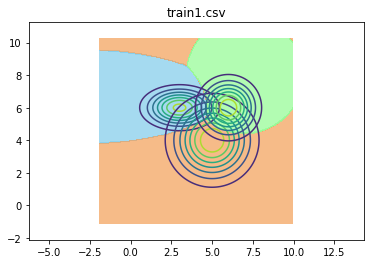

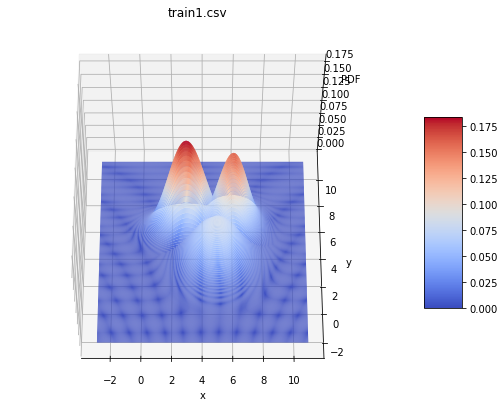

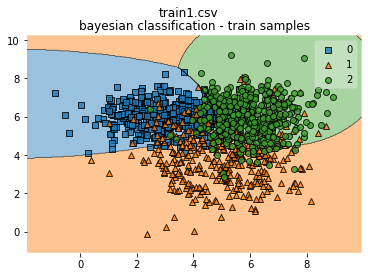

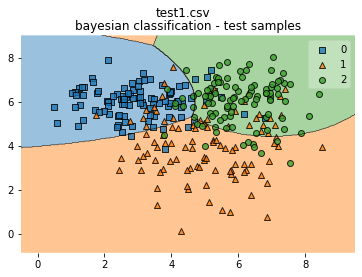

train data accuracy: 0.8158333333333333
test data accuracy: 0.7866666666666666


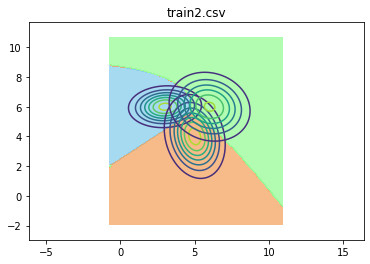

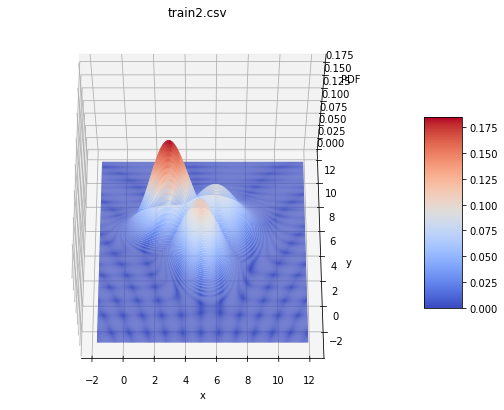

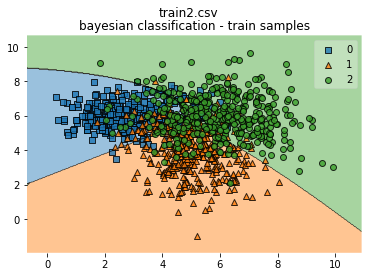

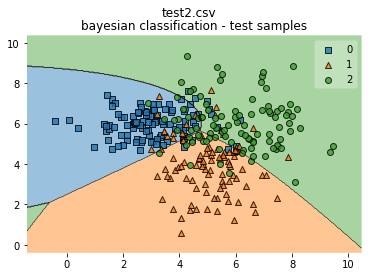

train data accuracy: 0.7866666666666666
test data accuracy: 0.7933333333333333


In [13]:
train_file_name = 'train1.csv'
test_file_name = 'test1.csv'
train_data = pd.read_csv(r'./' + train_file_name).to_numpy()
test_data = pd.read_csv(r'./' + test_file_name).to_numpy()

bc = BayesianClassification(train_data)

plot_contour(bc, train_file_name)
plot_3d_pdf(bc, train_file_name)
plot_samples(train_data, test_data, train_file_name, test_file_name, bc)
accuracy(bc, train_data, test_data)
    
#########################################
train_file_name = 'train2.csv'
test_file_name = 'test2.csv'
train_data = pd.read_csv(r'./' + train_file_name).to_numpy()
test_data = pd.read_csv(r'./' + test_file_name).to_numpy()

bc2 = BayesianClassification(train_data)

plot_contour(bc2, train_file_name)
plot_3d_pdf(bc2, train_file_name)
plot_samples(train_data, test_data, train_file_name, test_file_name, bc2)
accuracy(bc2, train_data, test_data)